Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,130 (51.29 KB)

 Trainable params: 13,130 (51.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500


45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.1271 - loss: 2.3745 - val_accuracy: 0.2028 - val_loss: 2.2511
Epoch 2/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2184 - loss: 2.2292 - val_accuracy: 0.2833 - val_loss: 2.1152
Epoch 3/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3164 - loss: 2.0786 - val_accuracy: 0.4222 - val_loss: 1.9827
Epoch 4/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4499 - loss: 1.9296 - val_accuracy: 0.5139 - val_loss: 1.8367
Epoch 5/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5461 - loss: 1.7701 - val_accuracy: 0.5861 - val_loss: 1.6823
Epoch 6/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6285 - loss: 1.5892 - val_accuracy: 0.6583 - val_loss: 1.5227
Epoch 7/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6566 - loss: 1.4574 - val_accuracy: 0.7139 - val_loss: 1.3680
Epoch 8/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7301 - loss: 1.2699 - val_accuracy: 0.7528 - val_loss: 1.

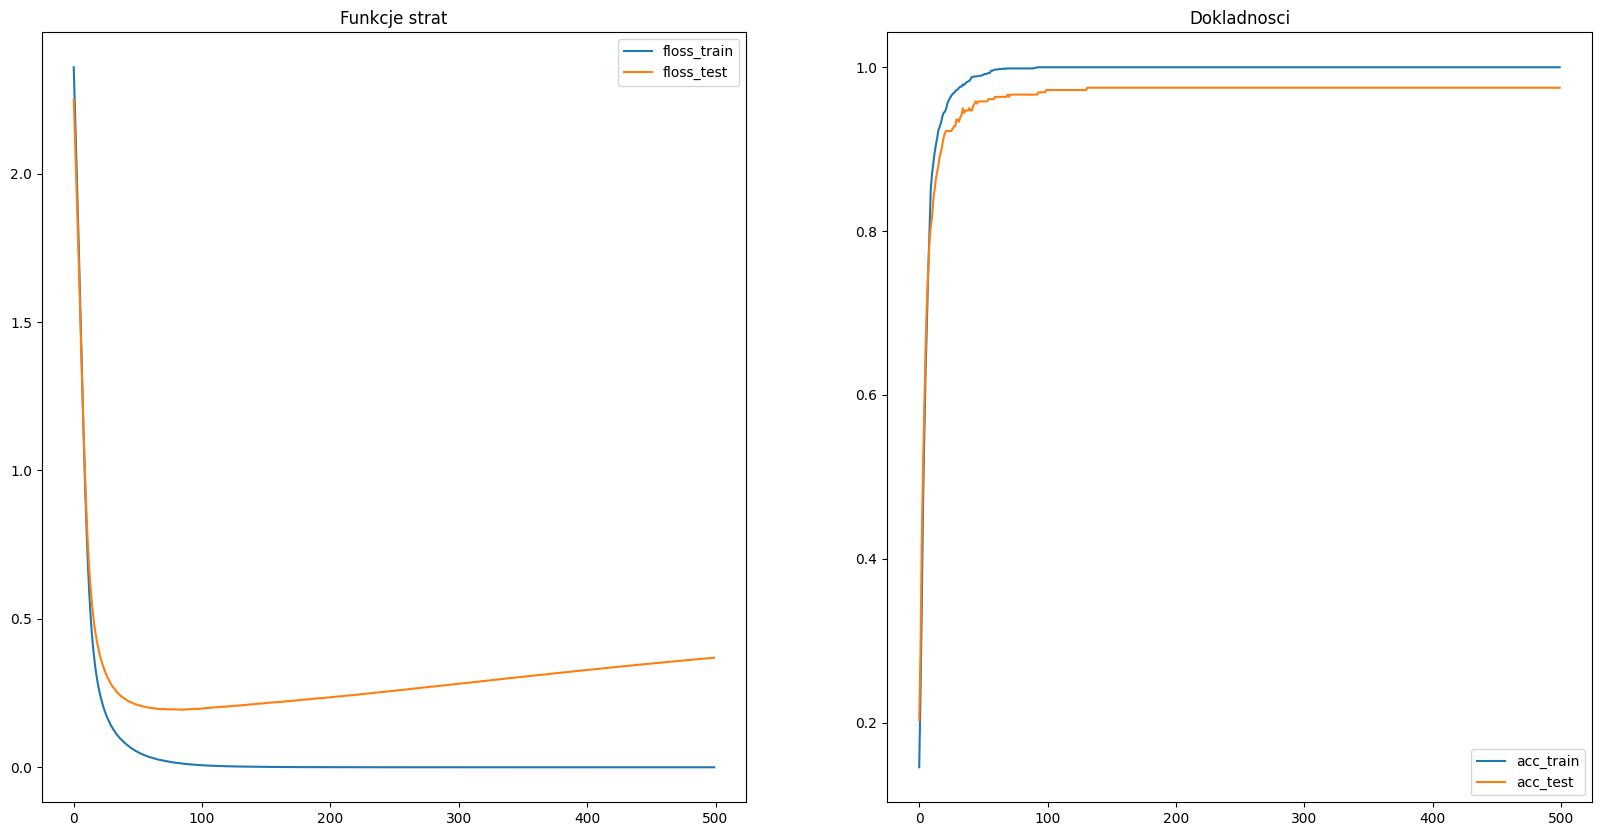

In [4]:
from sklearn.datasets import load_digits
import pandas as pd
data = load_digits()
y, X = data.target, data.data
y = pd.Categorical(y)
y = pd.get_dummies(y)
class_num = y.shape[1]
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.utils import plot_model

# Define the model
model = Sequential()
model.add(Input(shape=(X.shape[1],)))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(class_num, activation="softmax"))

# Compile the model
learning_rate = 0.0001
model.compile(optimizer=Adam(learning_rate), loss="categorical_crossentropy", metrics=["accuracy"])

# Print the model summary
model.summary()


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test))


from matplotlib import pyplot as plt
import numpy as np
historia = model.history.history
floss_train = historia['loss']
floss_test = historia['val_loss']
acc_train = historia['accuracy']
acc_test = historia['val_accuracy']
fig,ax = plt.subplots(1,2, figsize=(20,10))
epochs = np.arange(0, 500)
ax[0].plot(epochs, floss_train, label = 'floss_train')
ax[0].plot(epochs, floss_test, label = 'floss_test')
ax[0].set_title('Funkcje strat')
ax[0].legend()
ax[1].set_title('Dokladnosci')
ax[1].plot(epochs, acc_train, label = 'acc_train')
ax[1].plot(epochs, acc_test, label = 'acc_test')
ax[1].legend()

